In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [7]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [8]:
df = pd.read_csv('C:/Users/Sudheer Reddy/OneDrive - Saint Peters University/Desktop/meteorite-landings.csv')
print(df.head())

       name   id nametype     recclass      mass  fall    year    reclat  \
0    Aachen    1    Valid           L5      21.0  Fell  1880.0  50.77500   
1    Aarhus    2    Valid           H6     720.0  Fell  1951.0  56.18333   
2      Abee    6    Valid          EH4  107000.0  Fell  1952.0  54.21667   
3  Acapulco   10    Valid  Acapulcoite    1914.0  Fell  1976.0  16.88333   
4   Achiras  370    Valid           L6     780.0  Fell  1902.0 -33.16667   

     reclong               GeoLocation  
0    6.08333     (50.775000, 6.083330)  
1   10.23333    (56.183330, 10.233330)  
2 -113.00000  (54.216670, -113.000000)  
3  -99.90000   (16.883330, -99.900000)  
4  -64.95000  (-33.166670, -64.950000)  


In [ ]:
!pip install --upgrade seaborn


In [9]:
print(df.isnull().sum())

name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64


In [21]:
print(df.dtypes)

name            object
id               int64
nametype        object
recclass        object
mass           float64
fall            object
year           float64
reclat         float64
reclong        float64
GeoLocation     object
dtype: object


In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB
None


In [24]:
print(df.columns)

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')


In [28]:
print(df.columns)

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')


In [30]:
print(df[['reclong', 'reclat']].dtypes)

reclong    float64
reclat     float64
dtype: object


In [37]:
print(df[['reclong', 'reclat']].isnull().sum())

reclong    7315
reclat     7315
dtype: int64


In [34]:
df_cleaned = df.dropna(subset=['reclong', 'reclat'])

In [35]:
print(df.info)

<bound method DataFrame.info of              name     id nametype              recclass      mass   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong               GeoLoc

In [36]:
print(df[['reclong', 'reclat']].dtypes)

reclong    float64
reclat     float64
dtype: object


In [38]:
print(df[['reclong', 'reclat']].isnull().sum())

reclong    7315
reclat     7315
dtype: int64


In [40]:
mean_reclong = df['reclong'].mean()
mean_reclat = df['reclat'].mean()

In [42]:
df['reclong'].fillna(mean_reclong, inplace=True)
df['reclat'].fillna(mean_reclat, inplace=True)

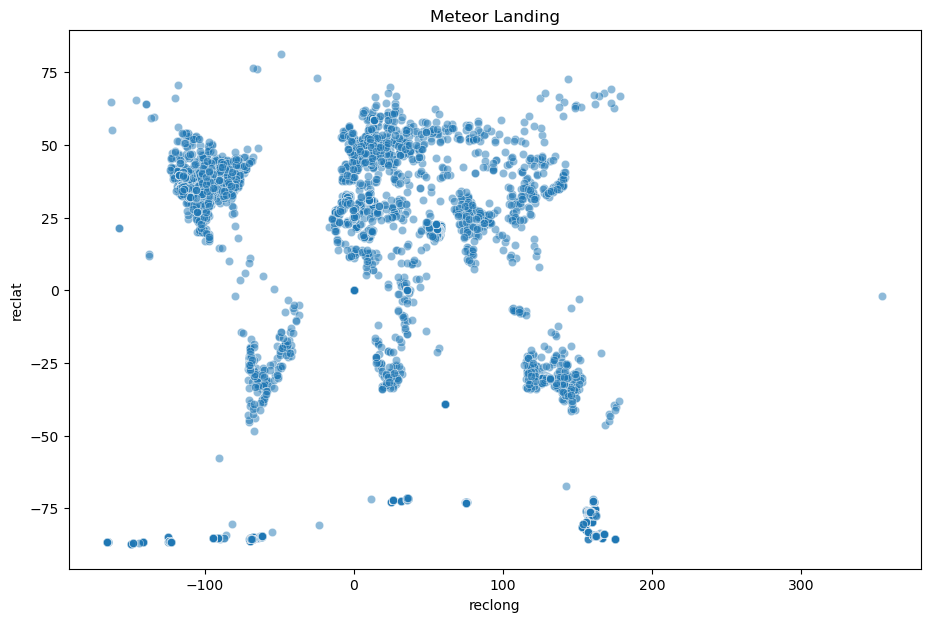

In [44]:
plt.figure(figsize=(11,7))
sns.scatterplot(x='reclong', y='reclat', data=df, alpha=0.5)
plt.title('Meteor Landing')
plt.xlabel('reclong')
plt.ylabel('reclat')
plt.show()

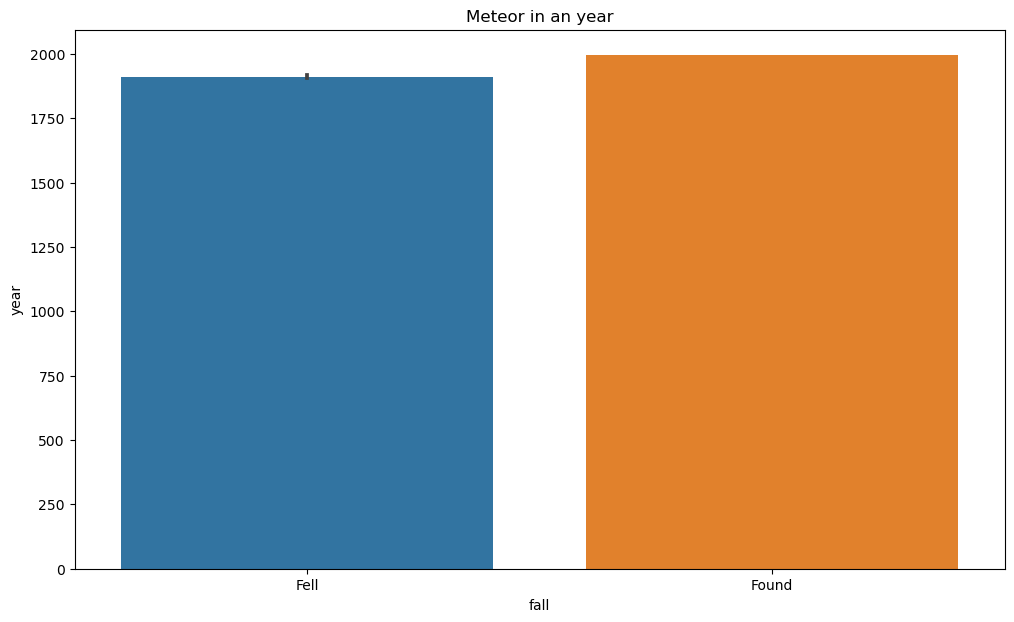

In [49]:
plt.figure(figsize=(12,7))
sns.barplot(x='fall', y='year', data=df)
plt.title('Meteor in an year')
plt.xlabel('fall')
plt.ylabel('year')
plt.show()

In [10]:
print(df.year)

0        1880.0
1        1951.0
2        1952.0
3        1976.0
4        1902.0
          ...  
45711    1990.0
45712    1999.0
45713    1939.0
45714    2003.0
45715    1976.0
Name: year, Length: 45716, dtype: float64


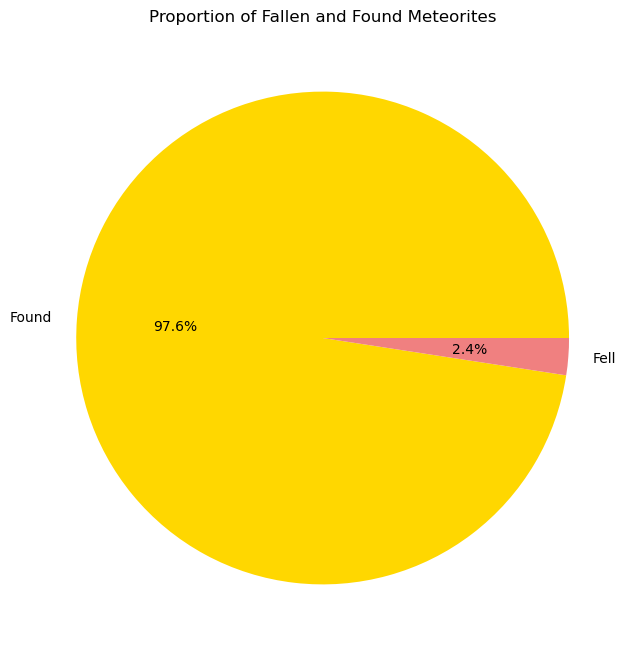

In [12]:
fall_counts = df['fall'].value_counts()
fall_counts.plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightcoral'], figsize=(8, 8))
plt.title('Proportion of Fallen and Found Meteorites')
plt.ylabel('')
plt.show()


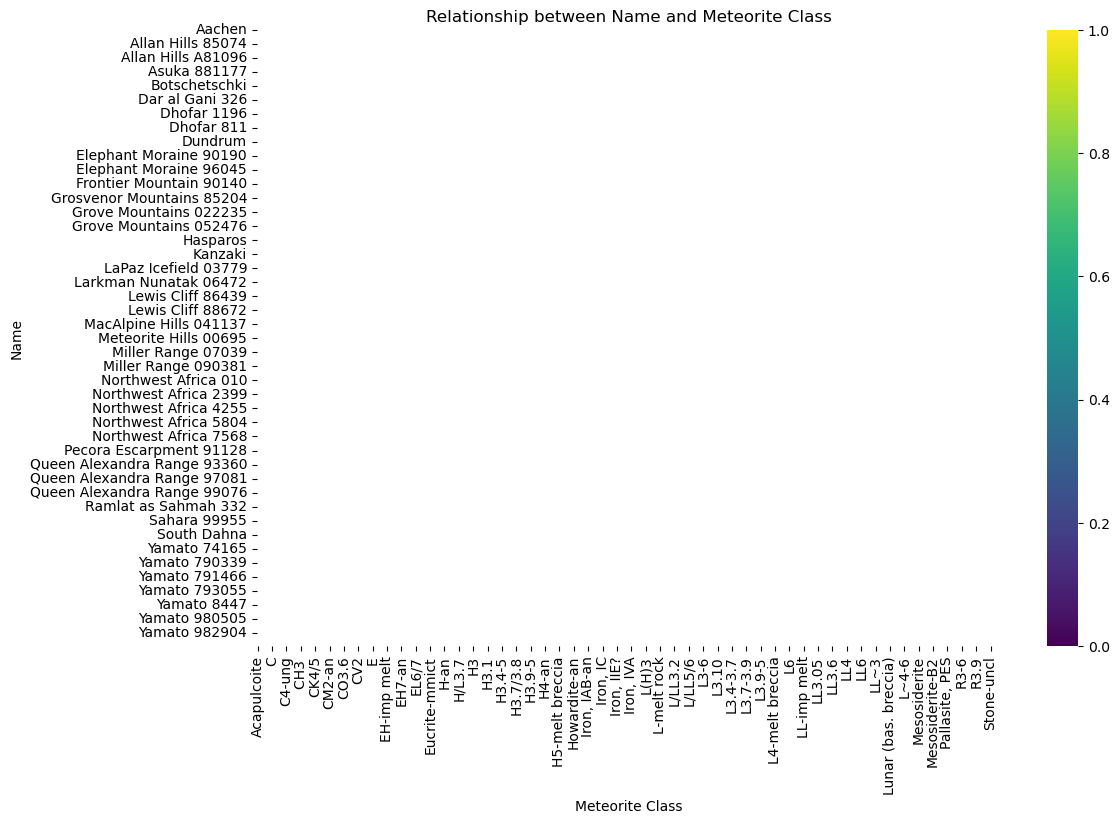

In [13]:
name_class_cross_tab = pd.crosstab(df['name'], df['recclass'])
plt.figure(figsize=(12, 8))
sns.heatmap(name_class_cross_tab, cmap='viridis', linewidths=.5)
plt.title('Relationship between Name and Meteorite Class')
plt.xlabel('Meteorite Class')
plt.ylabel('Name')
plt.show()

In [14]:
meteorite_counts = df.groupby(['recclass', 'name']).size().reset_index(name='count')

# Filter for cases where the same class has multiple names
same_class_diff_names = meteorite_counts[meteorite_counts.duplicated(subset=['recclass'], keep=False)]

# Display the result
print(same_class_diff_names)

          recclass                name  count
0      Acapulcoite            Acapulco      1
1      Acapulcoite   Allan Hills 84190      1
2      Acapulcoite  Allan Hills A77081      1
3      Acapulcoite  Allan Hills A78230      1
4      Acapulcoite  Allan Hills A81187      1
...            ...                 ...    ...
45711    Winonaite        Yamato 75305      1
45712    Winonaite       Yamato 791058      1
45713    Winonaite         Yamato 8005      1
45714    Winonaite       Yamato 983327      1
45715    Winonaite             Zag (b)      1

[45571 rows x 3 columns]


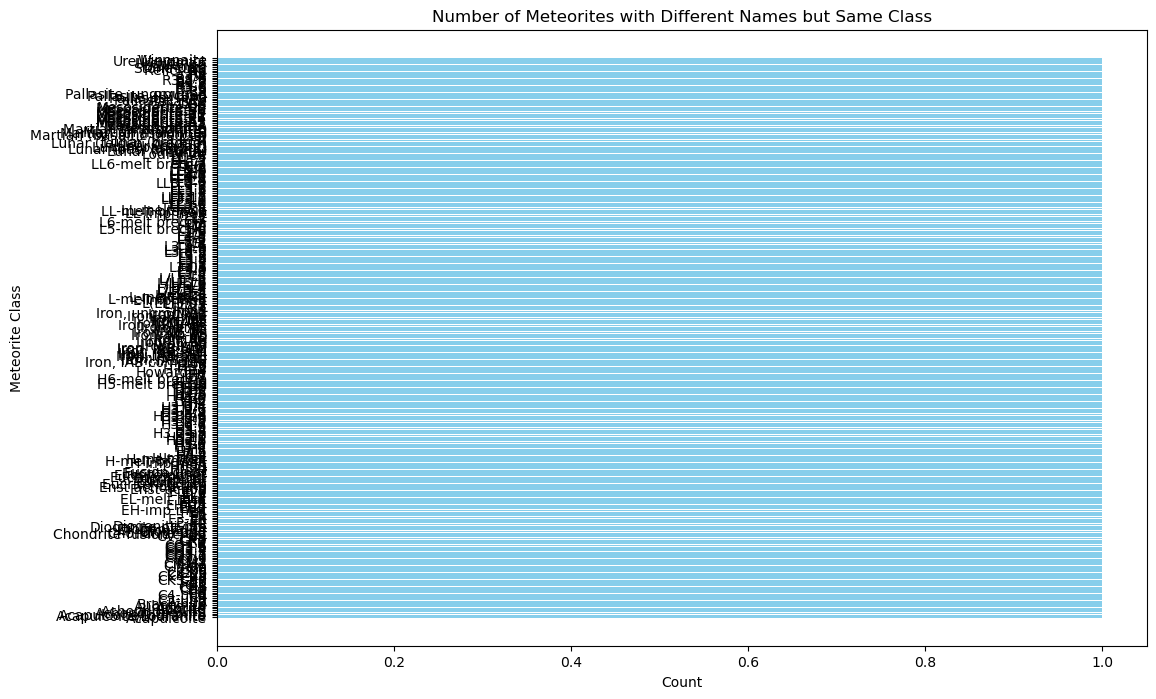

In [15]:
plt.figure(figsize=(12, 8))
plt.barh(same_class_diff_names['recclass'], same_class_diff_names['count'], color='skyblue')
plt.title('Number of Meteorites with Different Names but Same Class')
plt.xlabel('Count')
plt.ylabel('Meteorite Class')
plt.show()